In [2]:
import numpy as np, pandas as pd, scipy as sp
from matplotlib import pyplot as plt
from numpy.random import random, randint
from numpy.random import randint
import matplotlib.cm as cm
from ipywidgets import interact

In [3]:
size = 3
T = 2.5

In [4]:
state = random([size,size])

In [5]:
state

array([[0.60480801, 0.36398429, 0.42468015],
       [0.29290335, 0.57235304, 0.34047963],
       [0.49784343, 0.4643885 , 0.9405428 ]])

In [6]:
state[state<=0.5] = -1
state[state>0.5] = 1
print (state)

[[ 1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1.  1.]]


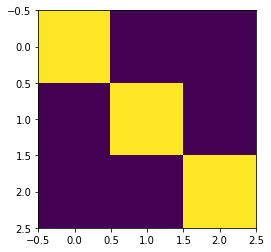

In [7]:
plt.imshow(state)

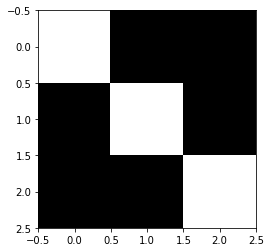

In [8]:
plt.imshow(state,cmap=cm.Greys_r)

In [9]:
def energy_one(s,i,j):
    from numpy import mod
    above = s[mod(i+1,size),j]
    below = s[mod(i-1,size),j]
    right = s[i,mod(j+1,size)]
    left =  s[i,mod(j-1,size)]
    #print(above,below,left,right)
    return -s[i,j]*(above+below+left+right)

In [10]:
print (energy_one(state,1,0))

0.0


In [11]:
def energy(state):
    total = 0
    for i in range(size):
        for j in range(size):
            total = total + energy_one(state,i,j)
    return total

What's next?
0. Pick a random state (done)
1. Consider a move:
    1. Flip one to the other sign
    2. If $\Delta U <= 0$, accept
    3. If $\Delta U > 0$, accept with boltzman probability

And, at this point, we should discuss the pseudocode and you should use [Schroeder's Model on the web](http://physics.weber.edu/schroeder/software/demos/IsingModel.html)

But, here's some fancy pants code:

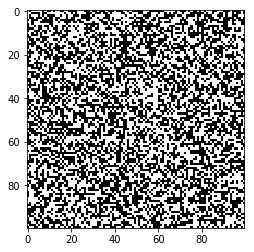

In [14]:
size = 100
state = random([size,size])
state[state<=0.5] = -1
state[state>0.5] = 1
plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)

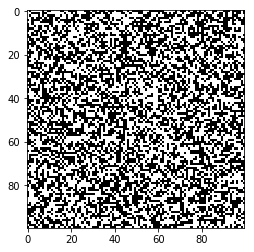

In [15]:
ntrials = 100
T = 3
for ntrial in range(ntrials):
    i,j = randint(size),randint(size)
    U = energy(state)
    trialstate = state.copy()
    trialstate[i,j] = trialstate[i,j]*(-1)
    trialU = energy(trialstate)
    deltaU = trialU-U
    if deltaU <= 0:
        state = trialstate
        #print("accept")
    else:
        if random() < np.exp(-deltaU/T):
            state = trialstate
            #print("accept")
        else:
            state = state
            #print("reject")
plt.imshow(state,interpolation='nearest',cmap=cm.Greys_r)